### Importing Libraries

In [275]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
from kmodes.kmodes import KModes


### Data Reading 

In [276]:
df = pd.read_csv('/home/manan/Desktop/Research/Learning-Perspectives/code/bstr.txt', sep=" ")

# changing the value of heads using the values in teacher's note
teachers_keywords = "/home/manan/Desktop/Research/Learning-Perspectives/data/data_notes/25n.txt"

heads = set()
openfile = open(teachers_keywords,'r')
readtext = openfile.read()
# reading into head
a = ""
for i in readtext:
    if i!=',':
        a = a+i
    else:
        heads.add(a)
        a = ""
heads.add("null")

# changin colomuns into head
df.columns = heads
# cleaning
df = df.drop(columns="scrum master ",axis=0)

In [277]:
print(df.columns)

Index(['resentment oo work ', 'continuous success ',
       'backlog refinement sprint backlog ', 'customer requirements ',
       'release cycles ', 'business owner ', 'metaphors metaphors ',
       'technical problems ', 'segments oo fdd ',
       'team learning yield software project teams ',
       ...
       'fast delivery ', 'customers needs ', 'success oo ',
       'projects oo adaptive software development asd adaptive software development ',
       'list oo plan ', 'lead programmers designers ',
       'short iterative fdd lifecycle ', 'scrum roles ', 'domain model ',
       'unnecessary code '],
      dtype='object', length=242)


In [278]:
print(df.head())

   resentment oo work   continuous success   \
0                    0                    1   
1                    0                    0   
2                    0                    1   
3                    0                    1   
4                    0                    1   

   backlog refinement sprint backlog   customer requirements   \
0                                   0                       1   
1                                   0                       0   
2                                   0                       1   
3                                   1                       0   
4                                   0                       0   

   release cycles   business owner   metaphors metaphors   \
0                0                1                     0   
1                0                1                     0   
2                0                1                     0   
3                0                0                     0   
4                0   

### Data Inspection

In [279]:
df.shape

(52, 242)

In [280]:
df.describe

<bound method NDFrame.describe of     resentment oo work   continuous success   \
0                     0                    1   
1                     0                    0   
2                     0                    1   
3                     0                    1   
4                     0                    1   
5                     0                    1   
6                     0                    1   
7                     0                    1   
8                     0                    1   
9                     0                    1   
10                    0                    1   
11                    1                    1   
12                    0                    1   
13                    0                    0   
14                    0                    1   
15                    0                    1   
16                    0                    0   
17                    0                    1   
18                    0                    1   
19    

### Using K-Mode with "Cao" initialization

In [281]:
km_cao = KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2524.0


In [282]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [283]:
clusterCentroidsDf

,resentment oo work,continuous success,backlog refinement sprint backlog,customer requirements,release cycles,business owner,metaphors metaphors,technical problems,segments oo fdd,team learning yield software project teams,...,fast delivery,customers needs,success oo,projects oo adaptive software development asd adaptive software development,list oo plan,lead programmers designers,short iterative fdd lifecycle,scrum roles,domain model,unnecessary code
0,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1
1,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,0,1,1,1,1,1


### Using K-Mode with "Huang" initialization

In [284]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 2378.0
Run 1, iteration: 2/100, moves: 0, cost: 2378.0


In [285]:
fitClusters_huang

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0], dtype=uint16)

### Testing Using Elbow Method

In [293]:
cost = []
for num_clusters in list(range(1,13)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(df)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2748.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2524.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 13, cost: 2168.0
Run 1, iteration: 2/100, moves: 0, cost: 2168.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 2130.0
Run 1, iteration: 2/100, moves: 7, cost: 2098.0
Run 1, iteration: 3/100, moves: 0, cost: 2098.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost: 2037.0
Run 1, iteration: 2/100, moves: 3, cost: 2021.0
Run 1, iteration: 3/100, moves: 0, cost: 2021.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6, cost

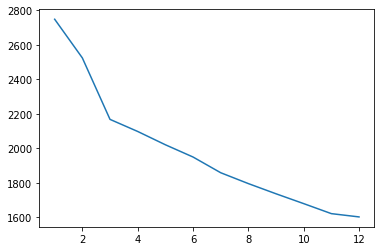

In [295]:
y = np.array([i for i in range(1,13)])
plt.plot(y,cost)

#### Value aroud 9-10 seems to be working fine

In [297]:
km_cao = KModes(n_clusters=9, init = "Cao", n_init = 1, verbose=1)
fitClusters_cao = km_cao.fit_predict(df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9, cost: 1737.0
Run 1, iteration: 2/100, moves: 0, cost: 1737.0


In [298]:
fitClusters_cao

array([2, 4, 0, 4, 0, 8, 4, 2, 4, 5, 0, 1, 0, 6, 6, 4, 7, 0, 0, 3, 2, 8,
       3, 1, 2, 2, 7, 0, 2, 2, 8, 3, 7, 5, 7, 2, 0, 0, 0, 8, 8, 2, 8, 2,
       2, 8, 0, 3, 2, 8, 8, 8], dtype=uint16)

In [299]:
clusterCentroidsDf = pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf.columns = df.columns

In [300]:
clusterCentroidsDf

,resentment oo work,continuous success,backlog refinement sprint backlog,customer requirements,release cycles,business owner,metaphors metaphors,technical problems,segments oo fdd,team learning yield software project teams,...,fast delivery,customers needs,success oo,projects oo adaptive software development asd adaptive software development,list oo plan,lead programmers designers,short iterative fdd lifecycle,scrum roles,domain model,unnecessary code
0,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,1
1,1,1,1,1,1,1,1,0,1,1,...,1,1,1,0,0,1,1,1,1,1
2,0,1,0,0,0,1,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
3,0,1,1,0,0,1,0,0,0,0,...,0,1,0,1,0,1,1,0,0,1
4,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
5,0,1,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
6,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,1,1,0,0,1
7,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
8,0,1,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,1,0,0,1


In [301]:
clusterCentroidsDf["sum"] = clusterCentroidsDf.sum(axis=1)

In [302]:
clusterCentroidsDf

,resentment oo work,continuous success,backlog refinement sprint backlog,customer requirements,release cycles,business owner,metaphors metaphors,technical problems,segments oo fdd,team learning yield software project teams,...,customers needs,success oo,projects oo adaptive software development asd adaptive software development,list oo plan,lead programmers designers,short iterative fdd lifecycle,scrum roles,domain model,unnecessary code,sum
0,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,1,0,0,1,91
1,1,1,1,1,1,1,1,0,1,1,...,1,1,0,0,1,1,1,1,1,198
2,0,1,0,0,0,1,0,1,0,0,...,1,0,1,0,0,1,0,0,1,91
3,0,1,1,0,0,1,0,0,0,0,...,1,0,1,0,1,1,0,0,1,115
4,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,54
5,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,89
6,0,0,0,1,0,0,0,0,0,0,...,1,0,0,0,1,1,0,0,1,56
7,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,72
8,0,1,0,0,0,1,0,0,0,0,...,1,0,1,0,0,1,0,0,1,97
